# Tree


In this file, we present the Tree data structure, which is a tree composed of costs on edges and an underlying metric between node states.
In this simple example, the states are two-dimensional ellipsoids.

First, let us import a few packages that are necessary to run this example.

In [1]:
using LinearAlgebra, Plots, Colors

The main package [Dionysos](https://github.com/dionysos-dev/Dionysos.jl) provides most important data structures that we will need.

In [2]:
using Dionysos
const UT = Dionysos.Utils

Dionysos.Utils

We define the underlying metric between node states

In [3]:
distance(E1::UT.Ellipsoid, E2::UT.Ellipsoid) = UT.pointCenterDistance(E1, E2.c)

distance (generic function with 1 method)

We define the action function to compute a transition between two states

In [4]:
get_action(E1::UT.Ellipsoid, E2::UT.Ellipsoid) = (1.0, 1.0)

get_action (generic function with 1 method)

We define the ellipsoids that will make up our tree states

In [5]:
Ellipsoids = [
    UT.Ellipsoid(Matrix{Float64}(I(2)) * 8.0, [-10.0; -10.0]),
    UT.Ellipsoid(Matrix{Float64}(I(2)) * 5.0, [0.0; -10.0]),
    UT.Ellipsoid(Matrix{Float64}(I(2)) * 1.0, [-10.0; 0.0]),
    UT.Ellipsoid(Matrix{Float64}(I(2)) * 3.0, [20.0; -10.0]),
    UT.Ellipsoid(Matrix{Float64}(I(2)) * 3.0, [-1.0; 0.0]),
    UT.Ellipsoid(Matrix{Float64}(I(2)) * 3.0, [1.0; -8.0]),
    UT.Ellipsoid(Matrix{Float64}(I(2)) * 3.0, [-1.0; 5.0]),
    UT.Ellipsoid(Matrix{Float64}(I(2)) * 3.0, [3.0; 0.0]),
]

8-element Vector{Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}}:
 Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}([8.0 0.0; 0.0 8.0], [-10.0, -10.0])
 Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}([5.0 0.0; 0.0 5.0], [0.0, -10.0])
 Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}([1.0 0.0; 0.0 1.0], [-10.0, 0.0])
 Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}([3.0 0.0; 0.0 3.0], [20.0, -10.0])
 Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}([3.0 0.0; 0.0 3.0], [-1.0, 0.0])
 Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}([3.0 0.0; 0.0 3.0], [1.0, -8.0])
 Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}([3.0 0.0; 0.0 3.0], [-1.0, 5.0])
 Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}([3.0 0.0; 0.0 3.0], [3.0, 0.0])

We define the root of the tree

In [6]:
tree = UT.Tree(Ellipsoids[1])

Number of nodes  : 1
Number of leaves : 1
Minimal value    : 0.0
Maximum value    : 0.0


Compute the transition between Ellipsoids[2] and the root of the tree

In [7]:
action, cost = get_action(Ellipsoids[2], tree.root.state)
nNode2 = UT.add_node!(tree, Ellipsoids[2], tree.root, action, cost)

Dionysos.Utils.NodeT{Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}}(Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}([5.0 0.0; 0.0 5.0], [0.0, -10.0]), Dionysos.Utils.NodeT{Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}}(Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}([8.0 0.0; 0.0 8.0], [-10.0, -10.0]), nothing, nothing, 0.0, 0.0, 0, Dionysos.Utils.NodeT{Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}}[Dionysos.Utils.NodeT{Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}}(#= circular reference @-3 =#)]), 1.0, 1.0, 1.0, 1, Dionysos.Utils.NodeT{Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}}[])

Connect Ellipsoids[3] to its closest node according to the underlying metric

In [8]:
nNode3 = UT.add_closest_node!(tree, Ellipsoids[3], distance, get_action)

Dionysos.Utils.NodeT{Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}}(Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}([1.0 0.0; 0.0 1.0], [-10.0, 0.0]), Dionysos.Utils.NodeT{Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}}(Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}([8.0 0.0; 0.0 8.0], [-10.0, -10.0]), nothing, nothing, 0.0, 0.0, 0, Dionysos.Utils.NodeT{Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}}[Dionysos.Utils.NodeT{Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}}(Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}([5.0 0.0; 0.0 5.0], [0.0, -10.0]), Dionysos.Utils.NodeT{Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}}(#= circular reference @-3 =#), 1.0, 1.0, 1.0, 1, Dionysos.Utils.NodeT{Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}}[]), Dionysos.Utils.NodeT{Dionysos.Utils.Ellipsoid{Float64, Matrix{Flo

Connect the other ellipsoids

In [9]:
nNode4 = UT.add_closest_node!(tree, Ellipsoids[4], distance, get_action)
nNode5 = UT.add_closest_node!(tree, Ellipsoids[5], distance, get_action)
nNode6 = UT.add_closest_node!(tree, Ellipsoids[6], distance, get_action)
nNode7 = UT.add_closest_node!(tree, Ellipsoids[7], distance, get_action)
nNode8 = UT.add_closest_node!(tree, Ellipsoids[8], distance, get_action)

Dionysos.Utils.NodeT{Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}}(Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}([3.0 0.0; 0.0 3.0], [3.0, 0.0]), Dionysos.Utils.NodeT{Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}}(Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}([3.0 0.0; 0.0 3.0], [-1.0, 0.0]), Dionysos.Utils.NodeT{Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}}(Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}([1.0 0.0; 0.0 1.0], [-10.0, 0.0]), Dionysos.Utils.NodeT{Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}}(Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}([8.0 0.0; 0.0 8.0], [-10.0, -10.0]), nothing, nothing, 0.0, 0.0, 0, Dionysos.Utils.NodeT{Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}}[Dionysos.Utils.NodeT{Dionysos.Utils.Ellipsoid{Float64, Matrix{Float64}, Vector{Float64}}}(Dionysos.Utils.Ell

Plot the tree

Number of nodes  : 8
Number of leaves : 4
Minimal value    : 0.0
Maximum value    : 3.0



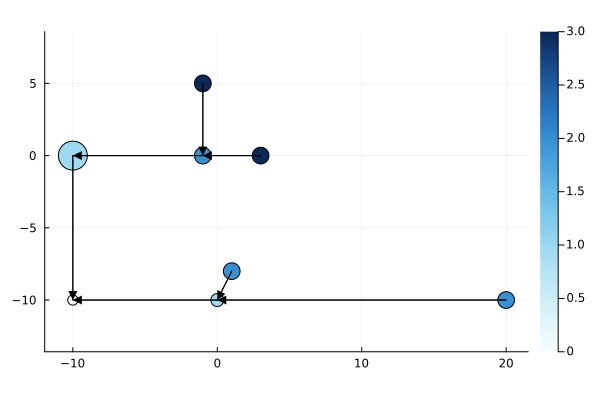

In [10]:
println(tree)
fig = plot(; aspect_ratio = :equal)
plot!(tree; arrowsB = true, cost = true)

We change the node's cost and update the tree accordingly

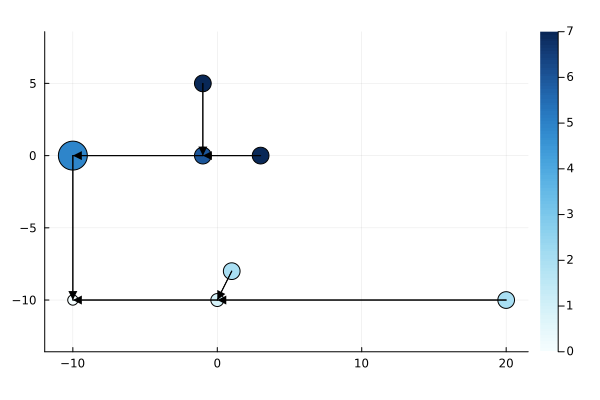

In [11]:
nNode3.path_cost = 5.0
UT.propagate_cost_to_leaves(nNode3)
fig = plot(; aspect_ratio = :equal)
plot!(tree)

We change the node's parent

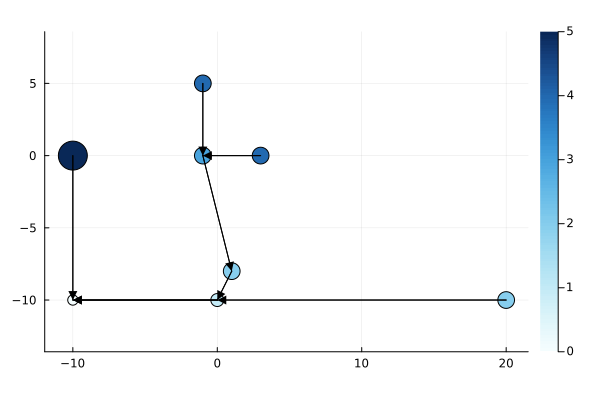

In [12]:
UT.rewire(tree, nNode5, nNode6, 1.0, 1.0)
fig = plot(; aspect_ratio = :equal)
plot!(tree)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*